# Comparisons, Masks, and Boolean Logic

Dentro de los arreglos de Numpy, una de las principales cualidades es la capacidad de filtrar o selecionar los elementos de un arreglo, ya vimos la forma de acceder o extraer subconjuntos de un arreglo de Numpy a través de slicing, si embargo vamos a presentar la selección por mascara y por fancy indexing

## Comparaciones

Antes de definir y entrar de lleno a las mascaras (mask) vamos a explicar las comparaciones, que al igual que las funciones built-in de numpy de suma (+), resta(-)m etc. y estas se pueden acceder por medio de los signos que conocemos de operaciones booleanas de Python

Pero antes veamos un ejemplo de uso de procesamiento de datos con estas funciones built-in de numpy

In [2]:
import numpy as np
import pandas as pd

In [7]:
# use Pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('./data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

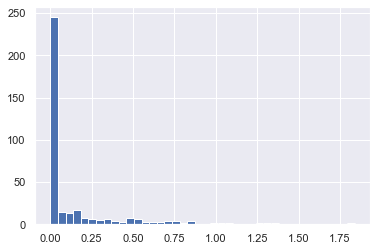

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # set plot styles

plt.hist(inches, 40);

In [12]:
x = np.array([1, 2, 3, 4, 5])
print('less than', x < 3)
print('greater than', x > 3)
print('greater than or equal', x >= 3) 
print('not equal', x != 3) 
print('equal', x == 3) 

less than [ True  True False False False]
greater than [False False False  True  True]
greater than or equal [False False  True  True  True]
not equal [ True  True False  True  True]
equal [False False  True False False]


Dentro de las operaciones de comparaciones podemos encontrar son

> Del lado izquierdo salen los simbolos que usariamos y del lado derecho podemos ver la función built-in de numpy

![comparaciones con numpy](./images/img4.png)

Vemas como sería el comportamiento de estos operadores en arreglos de dos dimensiones

In [13]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [14]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

Es exactamente igual a una dimesión, se genera un arreglo del tamaño del arreglo con el resultado de la comparación

## Trabajando con arreglos booleanos

Los resultados que hemos visto de los anteriores ejemplos es el un arreglo booleano es decir de valores True o False.

> En python los valores false son cero y cualqueir iterador vacio, todo lo demas es tomado como True

pero la principal funcion de este arreglo es que podemos seleccionar los elementos de un arreglo y procede a operar con los elementos selecioandos, esto es muy util para filtrar, operar o modifcar el contenido de los arreglos, veamos unos ejemplos.

In [16]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [21]:
print(x < 6)
print('how many values less than 6?:',np.count_nonzero(x < 6))

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]
how many values less than 6?: 8


In [23]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [24]:
# are there any values greater than 8?
np.any(x > 8)

True

In [25]:
# are there any values less than zero?
np.any(x < 0)

False

In [27]:
# are all values less than 10?
np.all(x < 10)

True

In [28]:
# are all values equal to 6?
np.all(x == 6)

False

In [29]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

Empleando solo operadores logicos, los cuales tenemso a disposición

![operadores booleanos](./images/img5.png)

In [30]:
np.sum((inches > 0.5) & (inches < 1))

29

In [33]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

In [36]:
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


# Mascaras con arreglos booleanos

Los arreglos booleanos nos permiten extraer los elementos que cumplen con una condición dada, veamos unos ejemplos

In [38]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [39]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [40]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

Vemos que selecciono los elemenos que cumplian con la condición dada

In [41]:
# construct a mask of all rainy days
rainy = (inches > 0)
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches): ",
np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ",
np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


# Fancy Indexing

El fancy indexing consiste en realizar busquedas dentro de los indices de los elementos de un arreglo, esto hace pasandole una lista de los indices por cada dimensión

In [44]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Accediendo por separado

In [45]:
[x[3], x[7], x[2]]

[71, 86, 14]

Sin embargo es mas facil pasando la lista con los indices

In [46]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

También podemos definir la estructura que queremos obtener al momento de extraerlos

In [47]:
ind = np.array([[3, 7],
[4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [48]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [49]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [50]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [51]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## Combinando indexing

In [52]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [53]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [54]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [55]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# Example: Selecting Random Points


In [67]:
mean = [0, 0]
cov = [[1, 2],
[2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

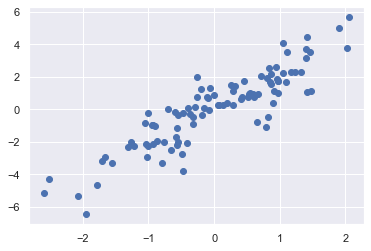

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling
plt.scatter(X[:, 0], X[:, 1]);

In [69]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([53, 22, 24, 99, 31, 17, 57, 93, 51, 26,  1, 86, 39, 71, 25, 40, 36,
       70, 98, 91])

In [70]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

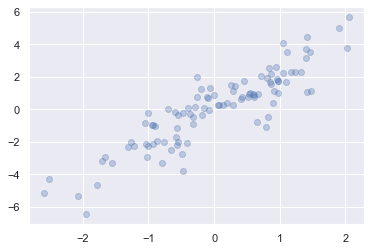

In [71]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
facecolor='none', s=200);

# Modifying values with fancy indexing

In [72]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [75]:
x[i] -= 10
print(x)

[ 0 69 69  3 69  5  6  7 69  9]


# Fast Sorting in NumPy: np.sort and np.argsort

Muchas veces queremos ordenar el contenido de nuestros arreglos, para ello existen multiples métodos para hacerlo, sin embargo tenemos muchas formas para hacerlo, por ejemplo 

In [78]:
import numpy as np
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [80]:

def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

x = np.array([2, 1, 4, 3, 5])
bogosort(x)

array([1, 2, 3, 4, 5])

Sin embargo teniendo en cuenta las funciones built-in de numpy, podemos usar funciones de ordenamiento que el mismo numpy nos ofrece

In [81]:
# sort with built-in funtion -> isn't transform the array
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [82]:
# sort as method -> it transform the array
x.sort()
print(x)

[1 2 3 4 5]


Adicional a la función de ordenamiento, numpy también nos brinda la función ``argsort`` el cual nos permite obtener los indices de ordenamiento, es decir que obtenemos el valor si la posición dentro del arreglo en donde se encuentra dicho valor

In [83]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [85]:
x[i]

array([1, 2, 3, 4, 5])

## Ordenando a lo largo de filas y columnas

In [86]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [87]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [88]:
# sort each row of X
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

otra funcionalidad que tenemos es la de ordenamiento parcializado, es decir que obtendremos cierto numeros de valores ordenados, para eso usamos la funcion ``np.partition``

Esta funcion te ordena del lado derecho los k elementos que quieras ordenar y del lado derecho quedan todos los demas elementos sin un orden especifico

In [89]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [90]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

# Ejemplo de aplicación: k-Nearest Neighbors

In [91]:
X = rand.rand(10, 2)

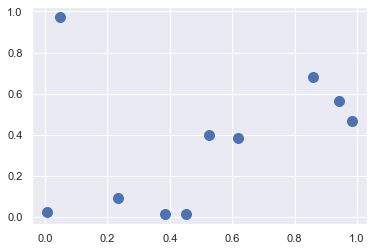

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [93]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [96]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [97]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [98]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [99]:
# their diagonal is full of zeros??
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [100]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [101]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

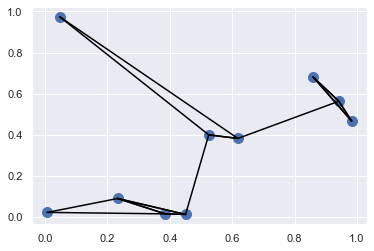

In [103]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')